In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("supply_train.csv")

In [4]:
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


#### We can drop this ID columns

In [5]:
df.drop(["Unnamed: 0","Ware_house_ID","WH_Manager_ID"],axis=1, inplace = True)

In [6]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071


### EDA

In [7]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 16620 non-null  object 
 1   WH_capacity_size              16620 non-null  object 
 2   zone                          16620 non-null  object 
 3   WH_regional_zone              16620 non-null  object 
 4   num_refill_req_l3m            16620 non-null  int64  
 5   transport_issue_l1y           16620 non-null  int64  
 6   Competitor_in_mkt             16620 non-null  int64  
 7   retail_shop_num               16620 non-null  int64  
 8   wh_owner_type                 16620 non-null  object 
 9   distributor_num               16620 non-null  int64  
 10  flood_impacted                16620 non-null  int64  
 11  flood_proof                   16620 non-null  int64  
 12  electric_supply               16620 non-null  int64  
 13  d

In [9]:
df.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [10]:
# Since half of the wh_est_year column is null we can drop this column
df.drop("wh_est_year",axis=1,inplace = True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [13]:
df.shape

(15374, 21)

### Now we can deal with the Catogorical columns

In [14]:
for column in df.columns:
    if df[column].dtypes == "object":
        print(f"{df[column].value_counts()}\n")

Location_type
Rural    14080
Urban     1294
Name: count, dtype: int64

WH_capacity_size
Large    6238
Mid      6209
Small    2927
Name: count, dtype: int64

zone
North    6289
West     4949
South    3875
East      261
Name: count, dtype: int64

WH_regional_zone
Zone 6    5140
Zone 5    2797
Zone 4    2561
Zone 2    1842
Zone 3    1806
Zone 1    1228
Name: count, dtype: int64

wh_owner_type
Company Owned    8377
Rented           6997
Name: count, dtype: int64

approved_wh_govt_certificate
C     3487
B+    3135
B     3086
A     2998
A+    2668
Name: count, dtype: int64



In [15]:
# Here in the column location_type more than 90 percentage belongs to Rural so we can drop this colum
df.drop("Location_type", axis=1, inplace=True)

In [16]:
cat_colm = df.select_dtypes(include="object").columns

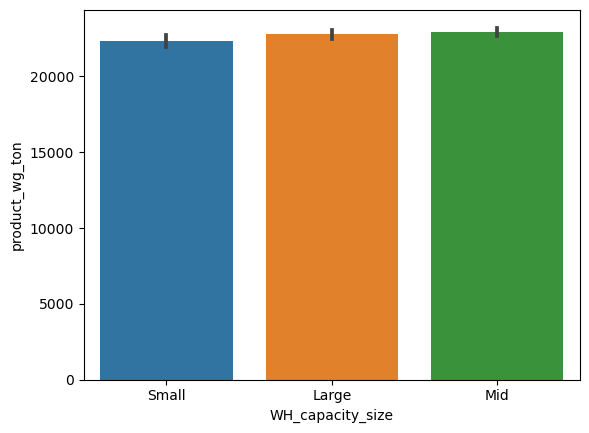

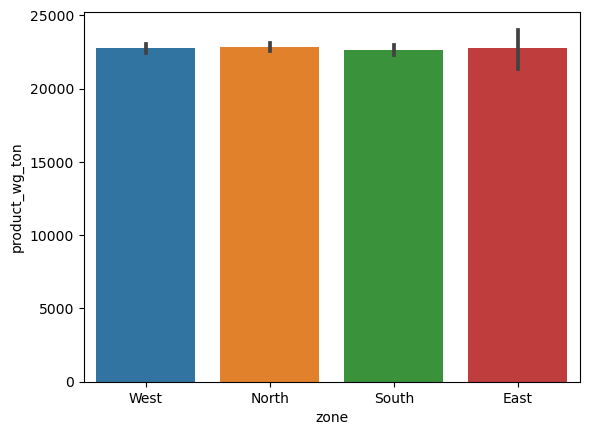

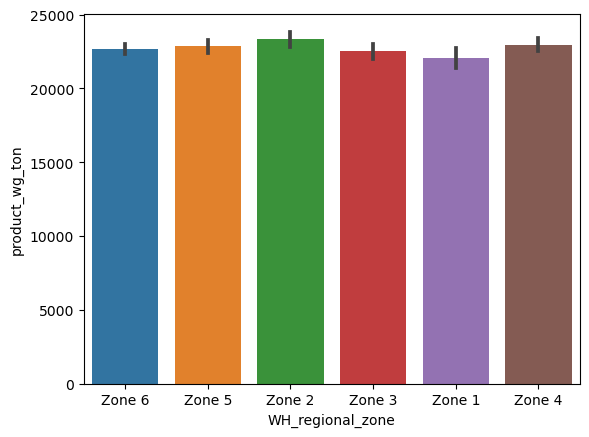

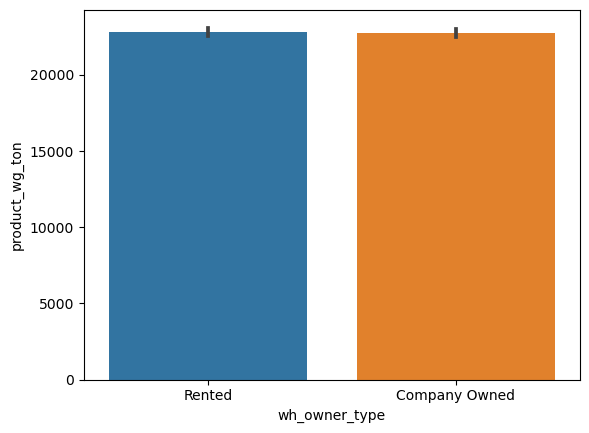

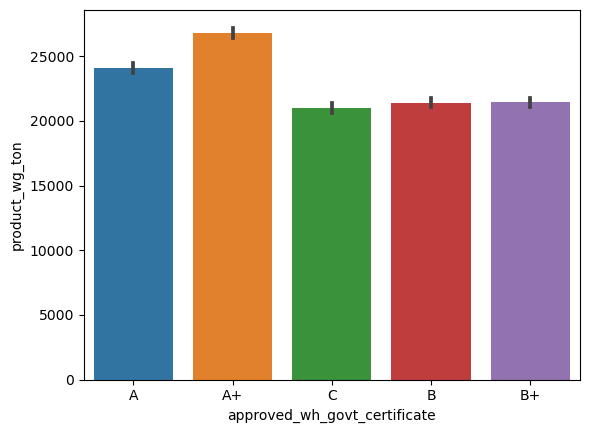

In [17]:
for colm in cat_colm:
    sns.barplot(data =df, x=colm, y="product_wg_ton")
    plt.show()

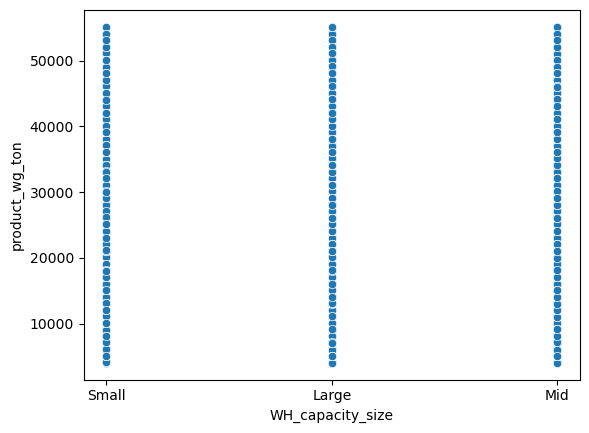

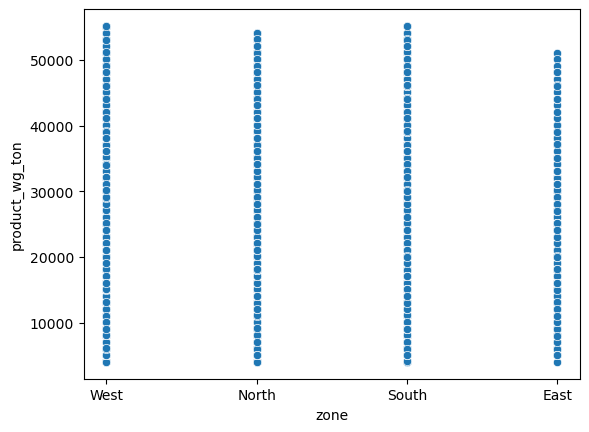

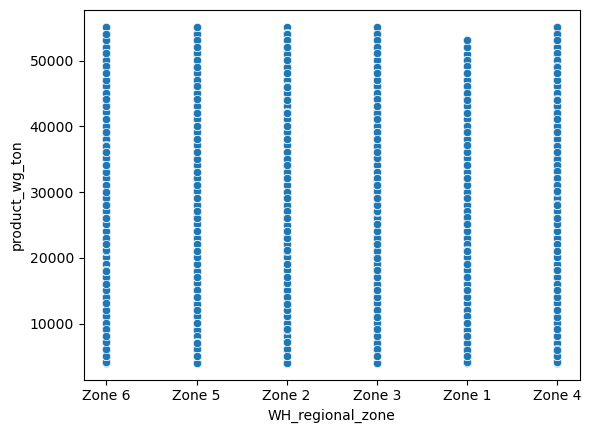

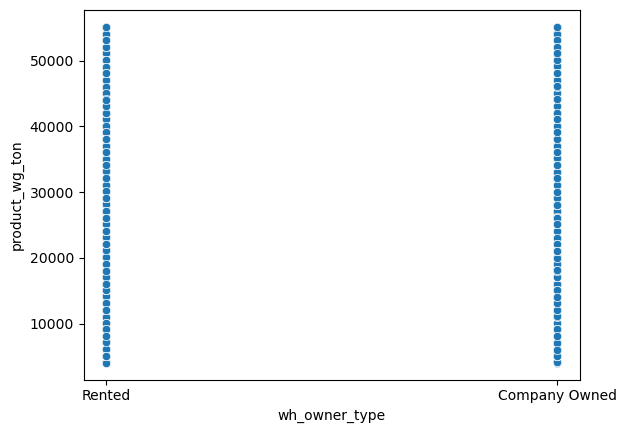

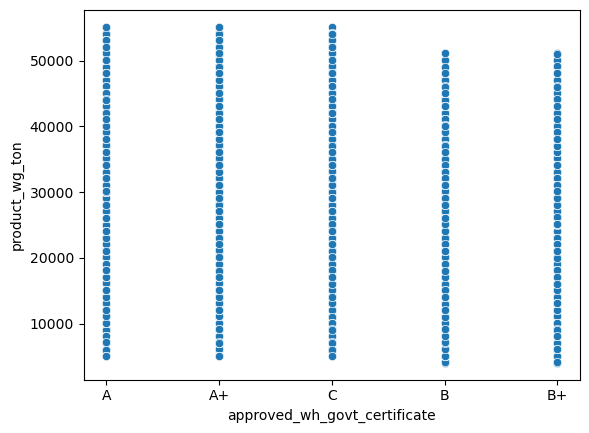

In [18]:
for colm in cat_colm:
    sns.scatterplot(x=colm,y="product_wg_ton",data=df)
    plt.show()

In [19]:
# From the above graph we can drop columns like WH_capacity_size, zone,wh_owner_type
df1 = df.drop(["WH_capacity_size","zone","wh_owner_type"],axis = 1)

### Now we can deal with numerical columns

In [20]:
for column in df.columns:
    if df[column].dtypes != "object":
        print(f"{column}:\n{df[column].describe()}\n")

num_refill_req_l3m:
count    15374.000000
mean         4.125537
std          2.608047
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req_l3m, dtype: float64

transport_issue_l1y:
count    15374.000000
mean         0.785027
std          1.211314
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: transport_issue_l1y, dtype: float64

Competitor_in_mkt:
count    15374.000000
mean         3.109471
std          1.150678
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: Competitor_in_mkt, dtype: float64

retail_shop_num:
count    15374.000000
mean      4982.868544
std       1052.075973
min       1821.000000
25%       4306.250000
50%       4855.000000
75%       5498.750000
max      11008.000000
Name: retail_shop_num, dtype: float64

distributor_num:
count    15374.000000
mean        42.

In [21]:
for column in df.columns:
    if df[column].dtypes != "object":
        print(f"{df[column].value_counts()}\n")

num_refill_req_l3m
8    1869
5    1829
3    1825
7    1814
0    1767
4    1732
6    1713
1    1700
2    1125
Name: count, dtype: int64

transport_issue_l1y
0    9326
1    2837
2    1328
3    1179
4     481
5     223
Name: count, dtype: int64

Competitor_in_mkt
2     5334
3     4359
4     4102
5      774
6      359
1      261
7      127
8       44
10       6
9        6
12       1
0        1
Name: count, dtype: int64

retail_shop_num
4367    17
5022    17
4808    17
4611    16
5057    15
        ..
2894     1
6389     1
7342     1
8011     1
2716     1
Name: count, Length: 4256, dtype: int64

distributor_num
49    305
69    300
41    297
36    295
44    295
21    295
37    294
59    294
63    291
42    291
35    291
40    291
48    291
29    288
47    287
24    286
30    285
31    284
28    284
50    283
65    282
22    280
57    278
38    276
33    275
54    275
56    275
15    275
26    274
18    273
67    270
64    270
32    269
52    269
55    269
23    268
66    268
62    267
58    

In [22]:
# From the above the data we can drop colums such us Flood_proof,flood_impacted,electric_supply,
# transport_issue_l1y,temp_reg_mach which are unbalanced and might not have any impact on the model

In [23]:
df2 = df1.drop(["flood_impacted","flood_proof","transport_issue_l1y","temp_reg_mach"], axis =1)

In [24]:
df2

,WH_regional_zone,num_refill_req_l3m,Competitor_in_mkt,retail_shop_num,distributor_num,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Zone 6,3,2,4651,24,1,91,29.0,13,A,5,15,17115
1,Zone 5,0,4,6217,47,1,210,31.0,4,A,3,17,5074
2,Zone 2,1,4,4306,64,0,161,37.0,17,A,6,22,23137
3,Zone 3,7,2,6000,50,0,103,21.0,17,A+,3,27,22115
4,Zone 5,3,2,4740,42,1,112,25.0,18,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Zone 5,0,3,5334,63,1,230,29.0,11,B,4,25,14089
16615,Zone 6,3,6,4779,70,0,240,19.0,14,B+,5,23,16094
16616,Zone 5,2,2,5718,26,1,164,30.0,17,B+,6,24,21113
16617,Zone 6,5,4,4514,50,1,211,24.0,24,B,5,29,28117


In [25]:
num_colm = []
for colm in df2.columns:
    if df2[colm].dtypes == "int64" or df2[colm].dtypes =="float":
        num_colm.append(colm)

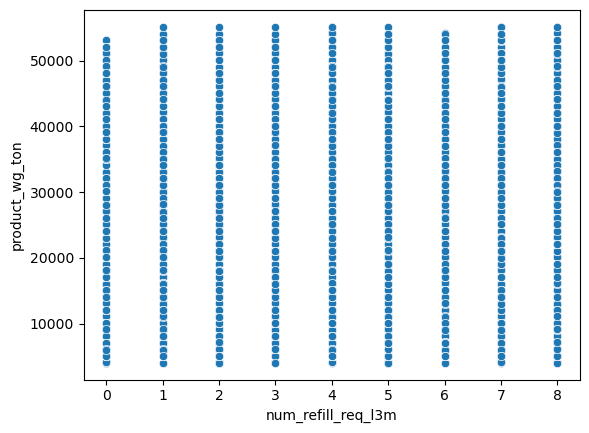

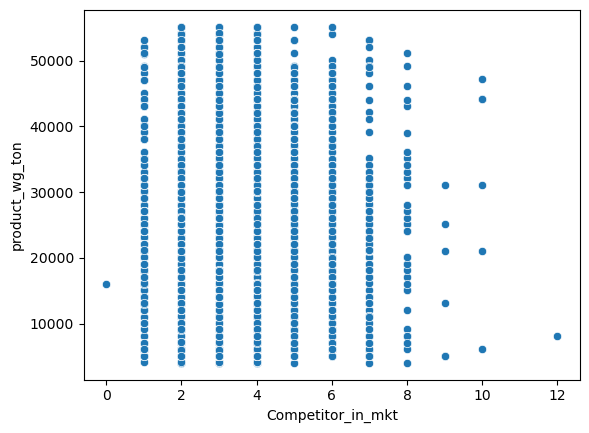

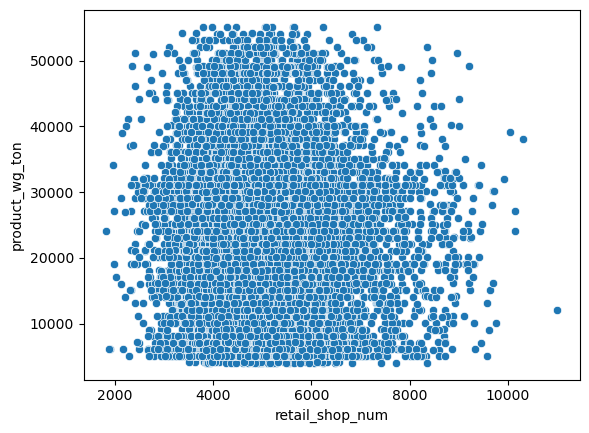

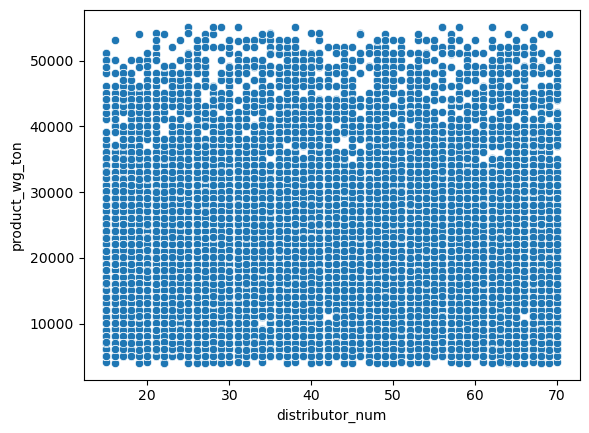

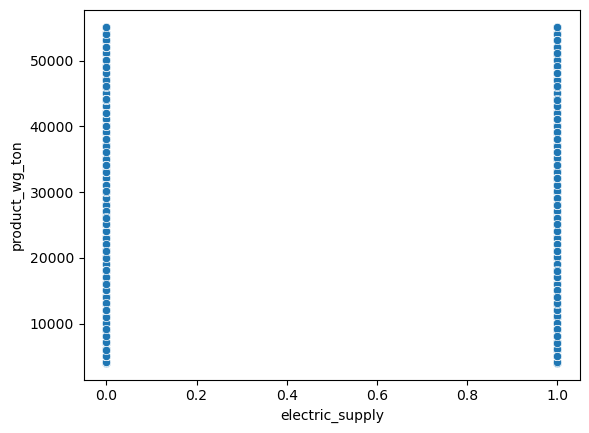

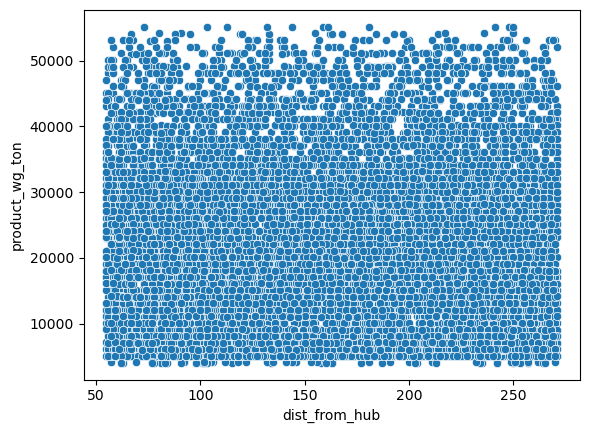

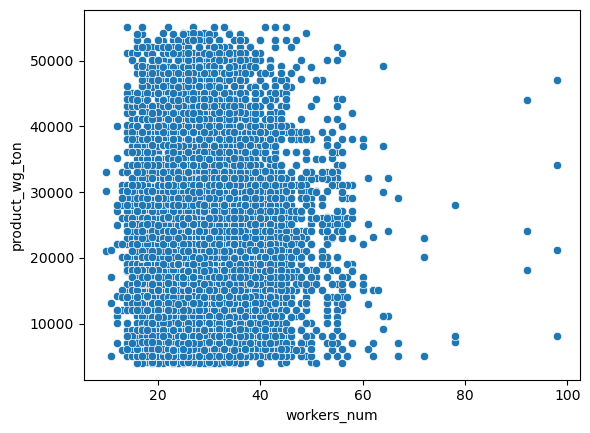

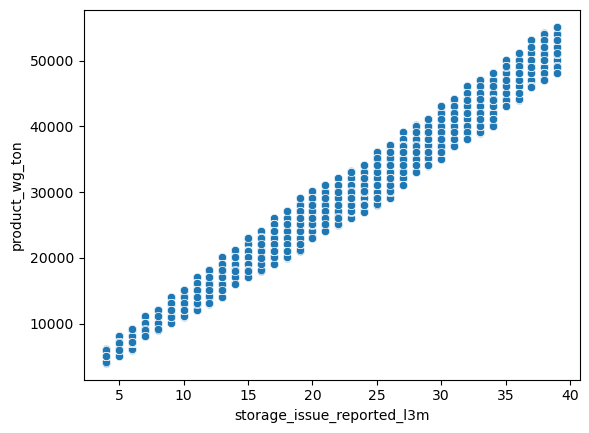

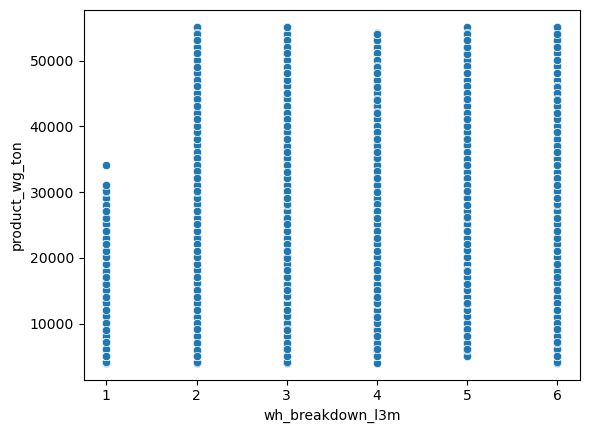

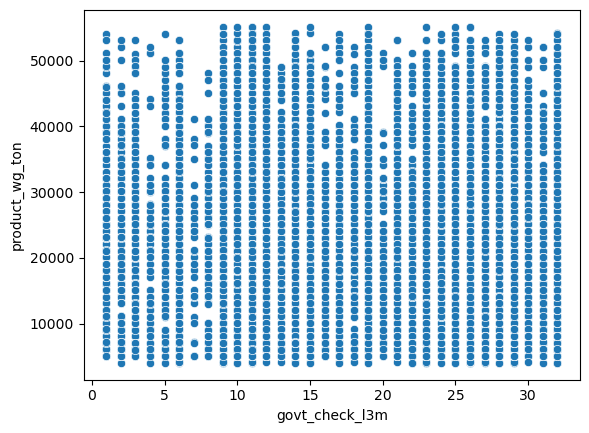

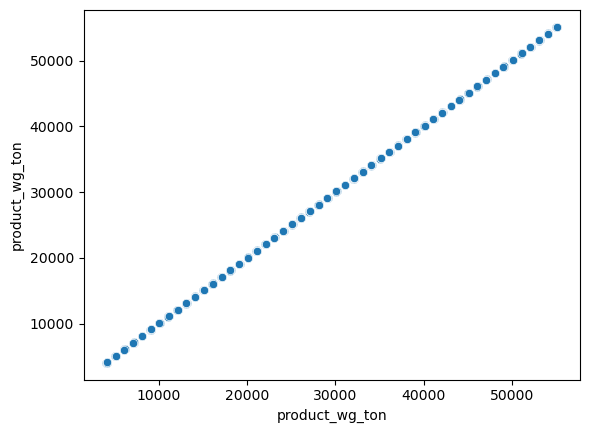

In [26]:
for colm in num_colm:
    sns.scatterplot(x=colm,y="product_wg_ton",data=df)
    plt.show()

In [27]:
# from the above graphs we can drop columns such as num_refill_req_l3m, Competitor_in_mkt, electric_supply, wh_breakdown_l3m,
# govt_check_l3m which might not have any impact on the model

In [28]:
df3 = df2.drop(["num_refill_req_l3m","Competitor_in_mkt","electric_supply","wh_breakdown_l3m","govt_check_l3m"], axis =1)

In [29]:
df3

,WH_regional_zone,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,product_wg_ton
0,Zone 6,4651,24,91,29.0,13,A,17115
1,Zone 5,6217,47,210,31.0,4,A,5074
2,Zone 2,4306,64,161,37.0,17,A,23137
3,Zone 3,6000,50,103,21.0,17,A+,22115
4,Zone 5,4740,42,112,25.0,18,C,24071
...,...,...,...,...,...,...,...,...
16613,Zone 5,5334,63,230,29.0,11,B,14089
16615,Zone 6,4779,70,240,19.0,14,B+,16094
16616,Zone 5,5718,26,164,30.0,17,B+,21113
16617,Zone 6,4514,50,211,24.0,24,B,28117


#### We can make Regional_zone_no from WH_regional_zone  by using a Function

In [30]:
def reg_zone (x):
    l = x.split()
    return l[-1]

In [31]:
df3["regional_zone_no"] = df3["WH_regional_zone"].apply(reg_zone)

In [32]:
df3

,WH_regional_zone,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,product_wg_ton,regional_zone_no
0,Zone 6,4651,24,91,29.0,13,A,17115,6
1,Zone 5,6217,47,210,31.0,4,A,5074,5
2,Zone 2,4306,64,161,37.0,17,A,23137,2
3,Zone 3,6000,50,103,21.0,17,A+,22115,3
4,Zone 5,4740,42,112,25.0,18,C,24071,5
...,...,...,...,...,...,...,...,...,...
16613,Zone 5,5334,63,230,29.0,11,B,14089,5
16615,Zone 6,4779,70,240,19.0,14,B+,16094,6
16616,Zone 5,5718,26,164,30.0,17,B+,21113,5
16617,Zone 6,4514,50,211,24.0,24,B,28117,6


In [33]:
# Now we can drop WH_regional_zone
df4 = df3.drop("WH_regional_zone", axis =1)

In [34]:
df4

,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,product_wg_ton,regional_zone_no
0,4651,24,91,29.0,13,A,17115,6
1,6217,47,210,31.0,4,A,5074,5
2,4306,64,161,37.0,17,A,23137,2
3,6000,50,103,21.0,17,A+,22115,3
4,4740,42,112,25.0,18,C,24071,5
...,...,...,...,...,...,...,...,...
16613,5334,63,230,29.0,11,B,14089,5
16615,4779,70,240,19.0,14,B+,16094,6
16616,5718,26,164,30.0,17,B+,21113,5
16617,4514,50,211,24.0,24,B,28117,6


#### We need to encode approved_wh_govt_certificate to numbers by using a dictionary

In [35]:
df4["approved_wh_govt_certificate"].value_counts()

approved_wh_govt_certificate
C     3487
B+    3135
B     3086
A     2998
A+    2668
Name: count, dtype: int64

In [36]:
grades_dic= {"A+":0, "A":1, "B+":2, "B":3, "C":4}

In [37]:
df4["grades_num"] = df["approved_wh_govt_certificate"].replace(grades_dic)

In [38]:
df4

,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,approved_wh_govt_certificate,product_wg_ton,regional_zone_no,grades_num
0,4651,24,91,29.0,13,A,17115,6,1
1,6217,47,210,31.0,4,A,5074,5,1
2,4306,64,161,37.0,17,A,23137,2,1
3,6000,50,103,21.0,17,A+,22115,3,0
4,4740,42,112,25.0,18,C,24071,5,4
...,...,...,...,...,...,...,...,...,...
16613,5334,63,230,29.0,11,B,14089,5,3
16615,4779,70,240,19.0,14,B+,16094,6,2
16616,5718,26,164,30.0,17,B+,21113,5,2
16617,4514,50,211,24.0,24,B,28117,6,3


In [39]:
# Now we drop approved_wh_govt_certificate colum
df5 = df4.drop("approved_wh_govt_certificate", axis =1 )

In [40]:
df5

,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,product_wg_ton,regional_zone_no,grades_num
0,4651,24,91,29.0,13,17115,6,1
1,6217,47,210,31.0,4,5074,5,1
2,4306,64,161,37.0,17,23137,2,1
3,6000,50,103,21.0,17,22115,3,0
4,4740,42,112,25.0,18,24071,5,4
...,...,...,...,...,...,...,...,...
16613,5334,63,230,29.0,11,14089,5,3
16615,4779,70,240,19.0,14,16094,6,2
16616,5718,26,164,30.0,17,21113,5,2
16617,4514,50,211,24.0,24,28117,6,3


#### Now we can separate the inputs as X and targets as y

In [41]:
X = df5.drop(["product_wg_ton"],axis=1)

In [42]:
y = df5["product_wg_ton"]

### Now we can do hyperparameter Tunning to find the best fit algorithm

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [44]:
model_params = {
    "Linear Regression":{
        "model" : LinearRegression(),
        "params": {
            "fit_intercept": [True, False]
        }
    },
    "Ridge Regression":{
        "model": Ridge(),
        "params": {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        }
    },
    "Lasso Rregression":{
        "model": Lasso(),
        "params": {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        }
    },
    "Decision Tree":{
        "model": DecisionTreeRegressor(),
        "params":{
            'max_depth': [None, 10, 20, 30]
        }
    },
    "Random Forest":{
        "model": RandomForestRegressor(),
        "params":{
            'n_estimators': [100, 200, 300]
            
        }
    },
    "GradientBoosting":{
        "model": GradientBoostingRegressor(),
        "params":{
            'n_estimators': [100, 200, 300]
        }
    }
}



In [45]:
scores = []
cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0 )

for algo_name, config in model_params.items():
    gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score= False)
    gs.fit(X,y)
    scores.append({
        "model": algo_name,
        "best score": gs.best_score_ ,
        "best params": gs.best_params_
    })

In [46]:
pd.DataFrame(scores)

,model,best score,best params
0,Linear Regression,0.982451,{'fit_intercept': True}
1,Ridge Regression,0.982451,{'alpha': 0.01}
2,Lasso Rregression,0.982451,{'alpha': 1.0}
3,Decision Tree,0.990797,{'max_depth': 10}
4,Random Forest,0.991924,{'n_estimators': 200}
5,GradientBoosting,0.992863,{'n_estimators': 100}


In [47]:
# We can choose Linear Regression as our best fitting model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

#### we can check the cross_validation_score using Linear_regression

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.9821648 , 0.98324692, 0.98118457, 0.98294931, 0.98271084])

### We have to preprocess our test_data

In [49]:
test_data = pd.read_csv("supply_test.csv")

In [50]:
test_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


#### we can make a function that will do the preprocessing for our test data

In [51]:
def preprocessing_of_test_data(df):
    
    # By picking the columns which we used for Training
    df = df[['WH_regional_zone', 'retail_shop_num', 'distributor_num',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'approved_wh_govt_certificate', 'product_wg_ton']]
    df1 = df.dropna()
    
    # creating a column of zone number | make sure the name of the new column is same as in train datset
    df1["regional_zone_no"] = df1["WH_regional_zone"].apply(lambda x: x.split()[-1])
    
    # Now we have to convert our approved_wh_govt_certificate to numbers by using the same dictionary
    df1["grades_num"] = df1["approved_wh_govt_certificate"].replace(grades_dic)
    
    # Now we can drop these columns such as WH_regional_zone, approved_wh_govt_certificate 
    
    df2 = df1.drop(["WH_regional_zone","approved_wh_govt_certificate"], axis =1 )
    
    
    return df2

In [52]:
preprocessed_test_data = preprocessing_of_test_data(test_data)

In [53]:
preprocessed_test_data

,retail_shop_num,distributor_num,dist_from_hub,workers_num,storage_issue_reported_l3m,product_wg_ton,regional_zone_no,grades_num
0,5590,15,156,30.0,24,30132,5,1
1,5856,40,79,31.0,5,6075,5,4
2,4803,40,70,41.0,19,24076,6,0
3,4784,15,255,33.0,9,13092,4,0
4,3699,24,205,20.0,25,29071,4,3
...,...,...,...,...,...,...,...,...
5523,3325,22,160,37.0,9,10068,6,3
5524,5030,46,203,28.0,22,29138,6,0
5526,5268,64,99,22.0,20,24072,6,2
5527,4378,32,220,17.0,13,15055,6,3


#### Now we categories these into X_test, y_test

In [54]:
X_test = preprocessed_test_data.drop("product_wg_ton", axis =1)

In [55]:
y_test = preprocessed_test_data["product_wg_ton"]

In [56]:
y_pred = model.predict(X_test)

#### Model Evaluation

In [57]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 1138.4439215101202


In [58]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2175729.518472602


In [59]:
# BY Using this we can find Root Mean Squared Error (RSME)
rsme = np.sqrt(mse)
print("Root Mean Squared Error (RSME):", rsme)

Root Mean Squared Error (RSME): 1475.0354295652028


In [60]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print("Accuracy Score:", r2_score)

Accuracy Score: 0.9832082032642899


### Residual Plots

In [61]:
residuals = y_test - y_pred

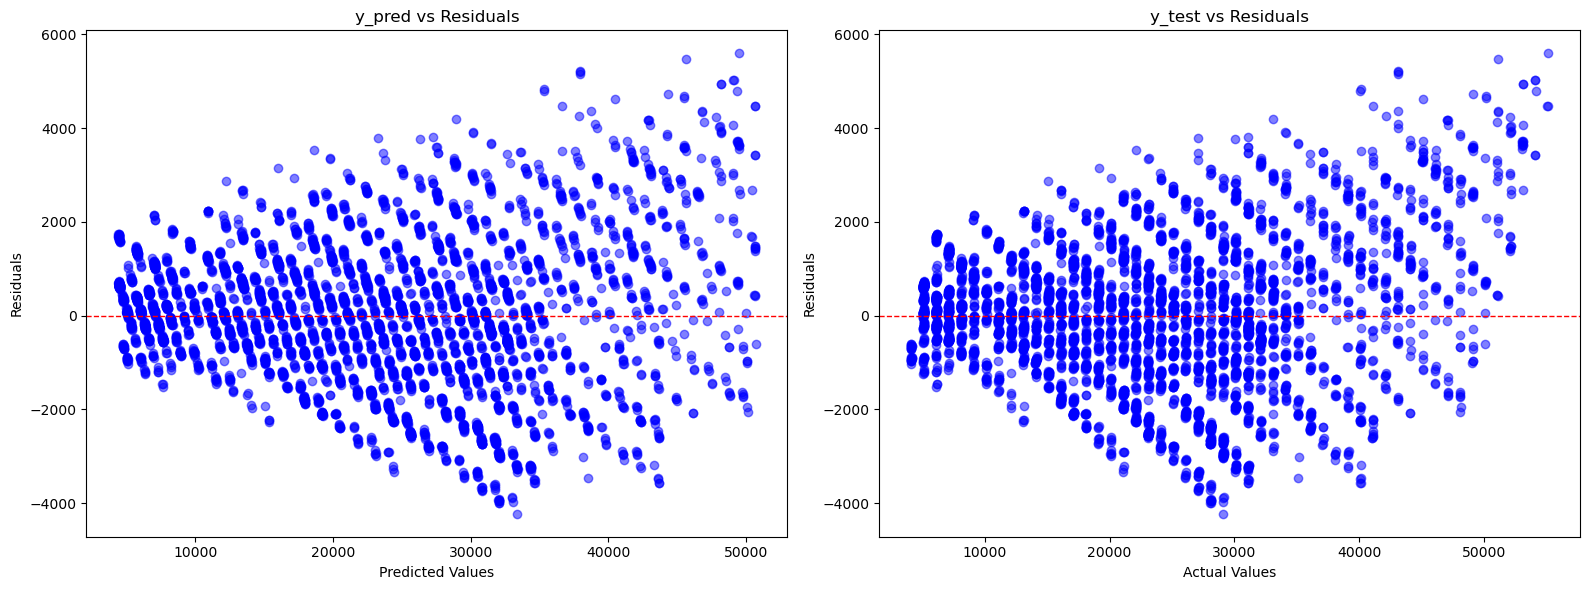

In [62]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('y_pred vs Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)  
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('y_test vs Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()  
plt.show()


#### Both looks almost same which means our model is performing good

#### Now we have to make a function whch predicts our Production

In [63]:
def predict_production(retail_shop_num, distributor_num,distance, workers,storage_issue_reported,zone,grades):
    try:
        retail_shop_num = int(retail_shop_num)
        distributor_num = int(distributor_num)
        distance = int(distance)
        workers = int(workers)
        storage_issue_reported = int(storage_issue_reported)
        zone = int(zone.split()[-1])
        grades = int(grades_dic[grades.upper()])
    
        return model.predict([[retail_shop_num,distributor_num,distance,workers,storage_issue_reported,zone,grades]])
    except ValueError:
        print("input Error")

In [64]:
predict_production(4000,50,100,35,34,"Zone 3","A+")

array([44260.44978242])

In [65]:
predict_production(1000,20,50,35,20,"Zone 2","c")

array([25022.77242629])

#### Now we can load our model as Pickle File

In [66]:
import pickle

with open('Supply_chain_model.pkl', 'wb') as file:
    pickle.dump(model, file)
